In [ ]:
!pip install geopandas

In [ ]:
!pip install contextily

In [ ]:
!pip install keplergl

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily
from keplergl import KeplerGl

In [2]:
roads = gpd.read_file('../data/egypt/gis_osm_roads_free_1.shp').to_crs(epsg=4326)

In [3]:
roads.shape

(1807496, 11)

In [4]:
roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry
0,4393316,5122,residential,None,None,B,0,0,F,F,"LINESTRING (34.5149 28.50103, 34.51491 28.5010..."
1,4393318,5115,tertiary,None,None,F,0,0,F,F,"LINESTRING (34.50649 28.50739, 34.50653 28.507..."
2,4393320,5142,track,None,None,B,0,0,F,F,"LINESTRING (34.46467 28.44007, 34.46461 28.440..."
3,4393324,5124,pedestrian,شارع المسبط,None,B,0,0,F,F,"LINESTRING (34.51665 28.49678, 34.51663 28.496..."
4,4393325,5124,pedestrian,None,None,B,0,0,F,F,"LINESTRING (34.5114 28.47745, 34.51163 28.4779..."


In [5]:
roads.isnull().sum()

osm_id            0
code              0
fclass            0
name        1563293
ref         1803361
oneway            0
maxspeed          0
layer             0
bridge            0
tunnel            0
geometry          0
dtype: int64

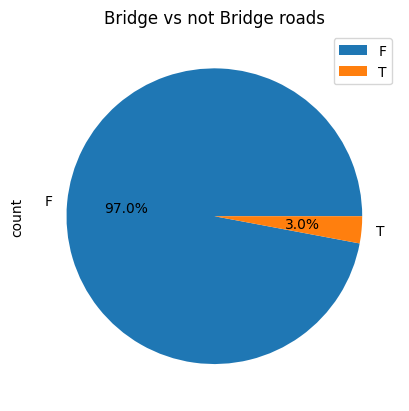

In [6]:
roads['bridge']\
  .value_counts()\
  .plot(kind='pie', legend=True, autopct='%1.1f%%')
plt.title("Bridge vs not Bridge roads")
plt.show()

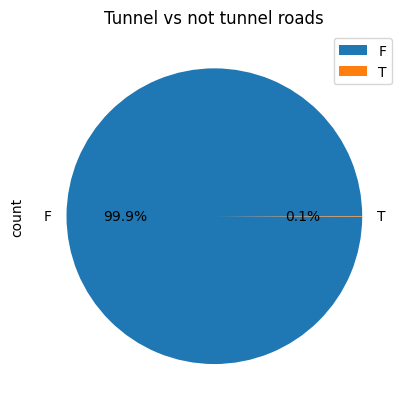

In [7]:
roads['tunnel']\
  .value_counts()\
  .plot(kind='pie', legend=True, autopct='%1.1f%%')
plt.title("Tunnel vs not tunnel roads")
plt.show()

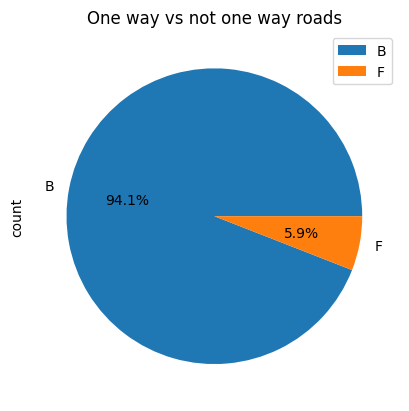

In [8]:
roads['oneway']\
  .value_counts()\
  .plot(kind='pie', legend=True, autopct='%1.1f%%')
plt.title("One way vs not one way roads")
plt.show()

In [9]:
roads['layer'].value_counts()

layer
 0    1753314
 1      52942
-1       1032
 2        188
 3         10
-2          8
 4          1
 5          1
Name: count, dtype: int64

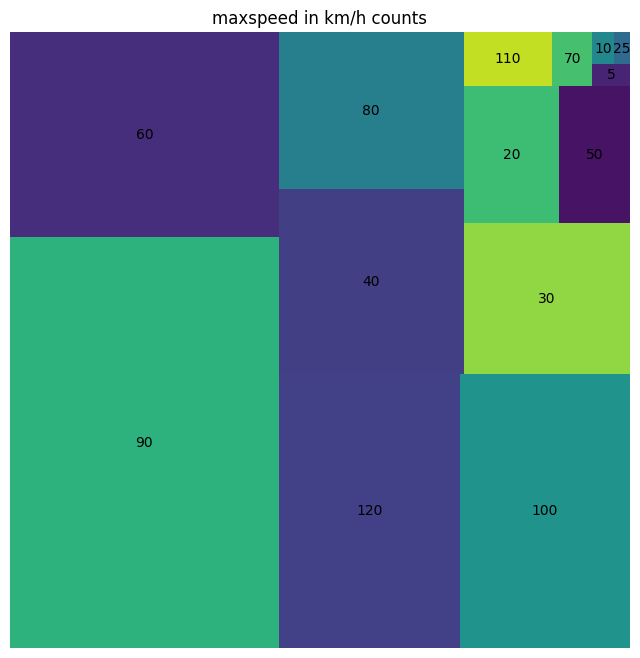

In [10]:
import squarify

speeds = roads['maxspeed']\
  .value_counts()\
  .reset_index()

speeds = speeds[speeds['maxspeed'] > 0]

plt.figure(figsize=(8,8))
squarify.plot(sizes=speeds['count'], label=speeds['maxspeed'])
plt.axis('off')
plt.title('maxspeed in km/h counts')
plt.show()

### Description of feature: "oneway" from OSM:

Is this a oneway road? “F” means that only driving
in direction of the linestring is allowed. “T” means
that only the opposite direction is allowed. “B”
(default value) means that both directions are ok.

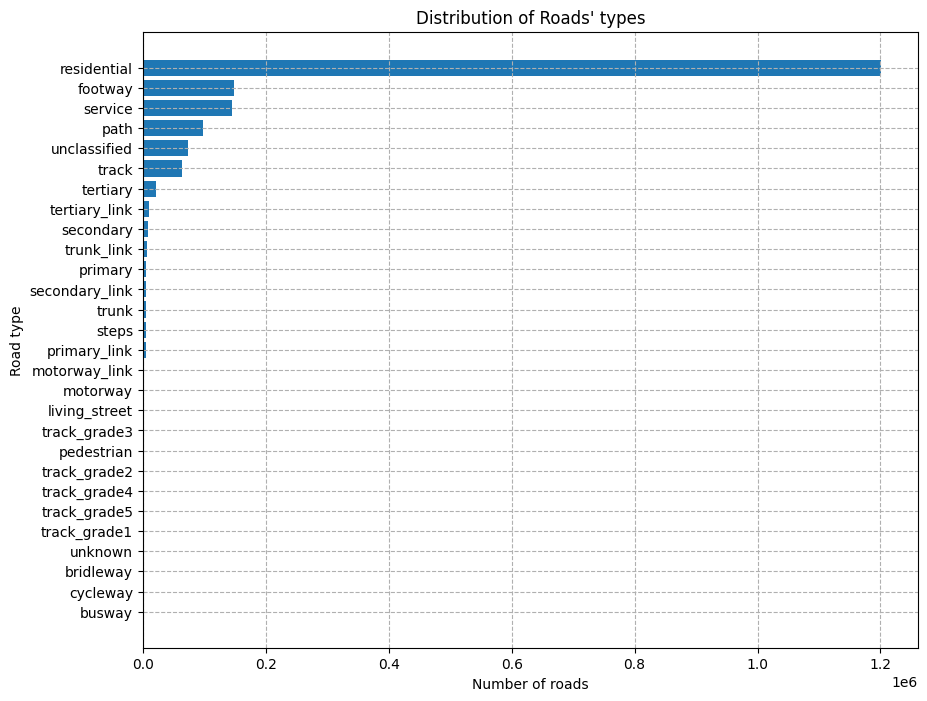

In [11]:
road_type_counts = roads['fclass'].value_counts().sort_values()

plt.figure(figsize=(10, 8))
plt.barh(
  y=road_type_counts.index, 
  width=road_type_counts.values,

  )
plt.grid(linestyle='--')
plt.title("Distribution of Roads' types")
plt.xlabel("Number of roads")
plt.ylabel("Road type")
plt.show()

In [12]:
alex = gpd.read_file('../data/egypt/alexandria.geojson').to_crs(epsg=4326)

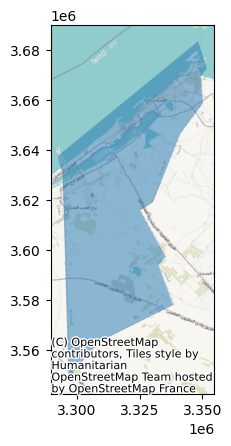

In [13]:
ax = alex.to_crs(epsg=3857).plot(alpha=0.5)
contextily.add_basemap(ax=ax)

In [14]:
road_geo = roads.geometry
alex_polygon = alex.geometry.iloc[0]

alex_roads_mask = road_geo.within(alex_polygon, align=True)
alex_roads = roads[alex_roads_mask]

In [15]:
alex_roads_plot = KeplerGl()
alex_roads_plot.add_data(data=alex_roads)
alex_roads_plot

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'unnamed': {'index': [233, 240, 241, 284, 285, 286, 287, 288, 289, 298, 299, 300, 301, 302, 303…

In [22]:
alex_roads.head()

,osm_id,code,fclass,name,ref,oneway,maxspeed,layer,bridge,tunnel,geometry,index
233,9929693,5114,secondary,شارع دكتور على مصطفى مشرفه,None,F,0,0,F,F,"LINESTRING (29.90688 31.20802, 29.90695 31.207...",233
240,10867224,5113,primary,شارع فيكتور ايمانويل الثالث,None,F,0,0,F,F,"LINESTRING (29.94582 31.21497, 29.9458 31.2150...",240
241,10867227,5115,tertiary,شارع اسماعيل سرى,None,F,0,0,F,F,"LINESTRING (29.94102 31.20779, 29.94115 31.207...",241
284,24044341,5114,secondary,شارع احمد اسماعيل,None,F,0,0,F,F,"LINESTRING (29.91834 31.19989, 29.91834 31.199...",284
285,24044344,5115,tertiary,None,None,F,0,0,F,F,"LINESTRING (29.9124 31.19612, 29.91248 31.1961...",285


In [21]:
alex_roads['index'] = alex_roads.index

alex_roads.to_file("../data/egypt/alex_roads.geojson", driver='GeoJSON')

c:\Users\yahia\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:1968: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


# Summary and Features we will take:
- fclass
- name
- oneway
- maxspeed
- layer
- bridge
- tunnel
- geometry
- index